### Import Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv')
df.sample(5)

,Age,Fare,Family,Survived
695,52.0,13.5000,0,0
704,26.0,7.8542,1,0
671,31.0,52.0000,1,0
588,22.0,8.0500,0,0
886,27.0,13.0000,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
# Check for percentage of null values
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

### Impute missing values with Median and Mean



In [5]:
# Separate Independent and Dependent Features
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
# Perform train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [8]:
# Check percentage of nulls values in training dataset
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [9]:
# Calculate Mean and Median values for Age and Fare Features
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [10]:
# Impute missing values with Mean and Median
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [11]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
220,16.0,8.0500,0,16.00,16.000000,8.0500,8.0500
837,NaN,8.0500,0,28.75,29.785904,8.0500,8.0500
359,NaN,7.8792,0,28.75,29.785904,7.8792,7.8792
783,NaN,23.4500,3,28.75,29.785904,23.4500,23.4500
324,NaN,69.5500,10,28.75,29.785904,69.5500,69.5500


In [12]:
# Check the variance of the features before and after imputation
# Ideally there should not be much change in variance. If there is 
# large variance for a feature, better not to impute that value
# Here, variance of Age has reduced to a greater extent than the Fare feature

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


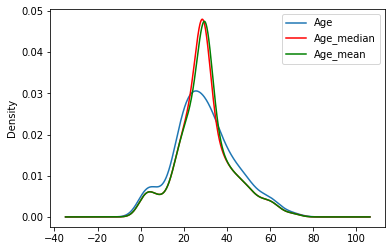

In [13]:
# Also, check the PDF of the features, before and after the imputation
# Here we can see for Age feature, the PDF has changed drastically whereas for 
# Fare feature the PDF is almost unchanged after imputation

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

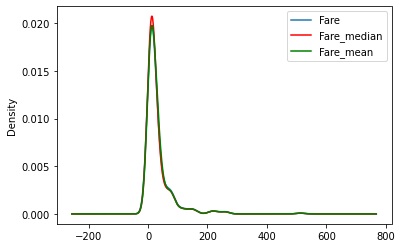

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [15]:
# Check if the covarianvce has changed after imputation
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [16]:
# Check if the correlation has changed after imputation
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


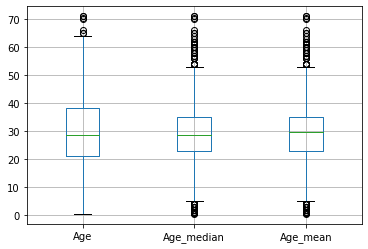

In [17]:
# Plot Box Plots if new 'Outliers' are introduced in the data after imputation.
# This happens because the IQR shrinks after imputation which gives rise to new outliers
# We can see new outliers getting created on Mean and Median Imputed dataset
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


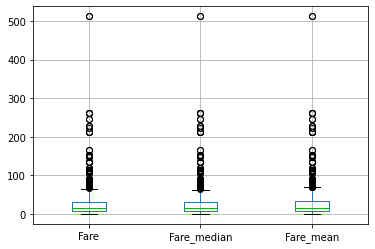

In [18]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

### Using Scikit-Learn to impute missing values with Mean and Median

In [19]:
# Perform train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
# Create Imputers 
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [21]:
# Use Column Transformers
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [22]:
# Fit on training dataset
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [23]:
# We can see the value calculated for Imputation by the imputers as below
print(trf.named_transformers_['imputer1'].statistics_)
print(trf.named_transformers_['imputer2'].statistics_)

[28.75]
[32.61759689]


In [24]:
# Finally Transform the train and test dataset
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

### Impute missing values with an Arbitrary Value

In [25]:
df = pd.read_csv('titanic_toy.csv')
df.sample(5)

,Age,Fare,Family,Survived
548,33.0,20.525,2,0
724,27.0,53.100,1,1
655,24.0,73.500,2,0
387,36.0,13.000,0,1
90,29.0,8.050,0,0


In [26]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [27]:
# Separate Independent and Dependent Features
X = df.drop(columns=['Survived'])
y = df['Survived']

# Perform Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
# Impute missing values with arbitrary values

X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [29]:
# Check the variance of the features before and after imputation
# Ideally there should not be much change in variance. If there is 
# large variance for a feature, better not to impute that value
# Here, variance of Age has reduced to a greater extent than the Fare feature

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 value imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 value imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 value imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 value imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 value imputation:  951.7275570187188
Age Variance after -1 value imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 value imputation:  47219.202652176304
Fare Variance after -1 value imputation:  2378.5676784883494


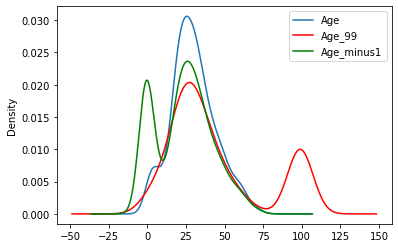

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

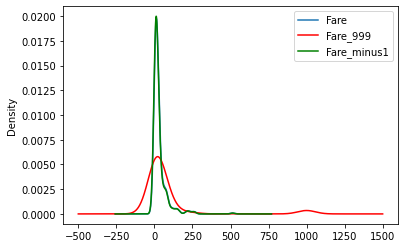

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [32]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [33]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


### Using Scikit-Learn to impute missing values with a Constant Arbitrary Value

In [34]:
# Perform train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
# Create Imputers 
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [36]:
# Use Column Transformers
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [37]:
# Fit on training dataset
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [38]:
# We can see the value calculated for Imputation by the imputers as below
print(trf.named_transformers_['imputer1'].statistics_)
print(trf.named_transformers_['imputer2'].statistics_)

[99.]
[999.]


In [39]:
# Finally Transform the train and test dataset
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [40]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])